# Salary Prediction based on Country and Race

هدف از این پروژه پیش بینی حقوق افراد از کشورها و نژادهای مختلف بر اساس جمعیت شناسی آنها مانند شغل، سن، جنسیت، تجربه، تحصیلات و غیره است. مجموعه داده از کگل گرفته شده است. مجموعه داده دارای 32561 ردیف و 15 ستون است. مجموعه داده دارای 8 متغیر مستقل و 1 متغیر هدف یعنی حقوق است

### Aboout the dataset

مجموعه داده شامل مجموعه ای جامع از اطلاعات حقوق و دستمزد و اطلاعات جمعیتی با جزئیات بیشتر در مورد سال ها تجربه است. این یک منبع ارزشمند برای مطالعه رابطه بین درآمد و عوامل مختلف اجتماعی و جمعیتی ارائه می دهد. ویژگی های جمعیت شناختی شامل سن، جنسیت، تحصیلات، کشور و نژاد است که طیف متنوعی از متغیرها را برای تجزیه و تحلیل فراهم می کند. محققان می‌توانند الگوها و روندهای توزیع درآمد را در دسته‌های جمعیتی مختلف بررسی کنند، که امکان بینشی در مورد تفاوت‌های بالقوه یا تغییرات در پتانسیل درآمد را فراهم می‌کند. علاوه بر این، مجموعه داده‌ها بعد مهم سال‌ها تجربه را در بر می‌گیرد و امکان بررسی تأثیر تصدی حرفه‌ای بر سطوح حقوق را فراهم می‌کند. این جنبه یک جنبه پویا به تجزیه و تحلیل اضافه می کند، و محققان را قادر می سازد تا بررسی کنند که چگونه درآمد بر اساس ویژگی های جمعیت شناختی و تجربه کاری انباشته متفاوت است. مجموعه داده فرصتی غنی برای انجام مطالعات جامع در مورد تنوع درآمد و درک عوامل چندوجهی مؤثر بر پتانسیل درآمد در نیروی کار امروزی ارائه می دهد..

### Data Dictionary

|Column|Description|
|---|---|
|Unnamed: 0|Index|
|Age|Age of the employee|
|Education Level|Education level of the employee|
|Job Title|Job title of the employee|
|Years of Experience|Years of experience of the employee|
|Salary|Salary of the employee|
|Country|Country of the employee|
|Race|Race of the employee|

# importing the libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# loading the data

In [4]:

df = pd.read_csv('Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Data Preprocessing

In [5]:
#checking the shape of the data
df.shape

(6704, 9)

In [6]:
#checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null/missing value is very less as compared to the total number of rows, I will be dropping these rows.

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [9]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

Checking data type of each column

In [10]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Checking for unique values in each column

In [11]:
#unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

ستون عنوان شغل دارای 191 مقدار مختلف است. تحلیل این همه عناوین شغلی بسیار دشوار خواهد بود. بنابراین، من عناوین شغلی را در دامنه های شغلی مشابه گروه بندی می کنم.

#### Grouping Job Titles

In [12]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [14]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [16]:
df['Job Title'].unique()

array(['Software/Developer', 'Data Analyst/Scientist',
       'Manager/Director/VP', 'Sales', 'Marketing/Social Media',
       'Customer Service/Receptionist', 'Other', 'IT/Technical Support',
       'Product/Designer', 'Financial/Accountant', 'HR/Human Resources',
       'Operations/Supply Chain'], dtype=object)

In [15]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

در مجموعه داده، سطح تحصیلات به دو صورت مختلف نشان داده می شود: لیسانس و مدرک کارشناسی، که به معنای یکسان است. بنابراین من آن را با کارشناسی گروه بندی خواهم کرد

#### Grouping Education Level

In [17]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

#### Descriptive Statistics

In [18]:
#descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [19]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis

در تجزیه و تحلیل داده های اکتشافی،  داده ها نگاه خواهیم کرد و سعی می کنیم داده ها را درک کنم.  با نگاهی به توزیع داده ها در سراسر مجموعه داده شروع می کنیم و سپس داده ها را برای درک رابطه بین ویژگی ها و متغیر هدف تجسم می کنم.

### Pie chart for Gender

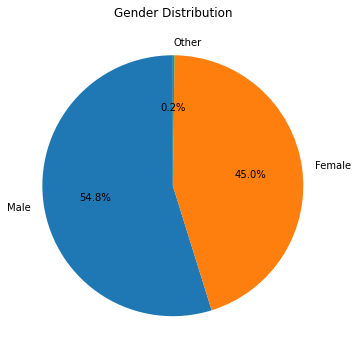

In [20]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

نمودار دایره ای نشان می دهد که اکثر کارکنان ، مرد با 54.8 درصد از مجموعه داده ها هستند، پس از آن زن ها ، با 45 درصد و 0.2 درصد کارمندان متعلق به سایر جنسیت ها هستند.

### Age Distribution

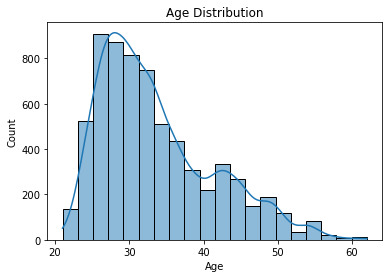

In [21]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

اکثریت کارکنان در محدوده سنی 25 تا 35 سال قرار دارند که به این معنی است که اکثر کارکنان جوان و پرانرژی هستند. تنها تعداد حداقلی از کارکنان قدیمی در مجموعه داده وجود دارد که سن آنها بیش از 55 سال باشد.

### Education Level

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

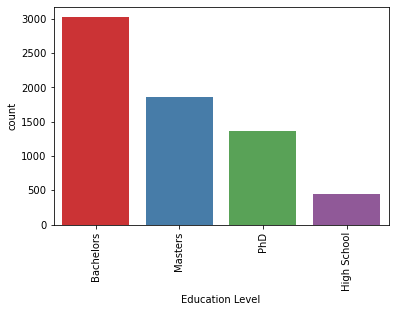

In [22]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=90)

اکثر کارکنان دارای مدرک لیسانس و پس از آن مدرک کارشناسی ارشد و دکترا هستند. کمترین تعداد کارمندان دارای تحصیلات دبیرستانی هستند. از نمودار مشخص است که اکثر کارمندان پس از فارغ التحصیلی شروع به کار کرده اند، تعداد کمی از آنها پس از فارغ التحصیلی شروع به کار کرده اند و تعداد بسیار کمی از آنها برای دکترا رفته اند. کمترین تعداد کارمندان بعد از تحصیلات متوسطه شروع به کار کرده اند

### Job Title

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

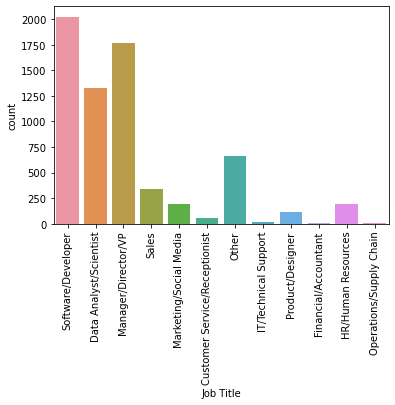

In [23]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

این نمودار به ما کمک می کند تا داده های عنوان شغل را به شکل ساده تری تجزیه کنیم. از نمودار، مشخص است که اکثر کارمندان دارای عناوین شغلی هستند - توسعه دهنده نرم افزار، تحلیلگر داده / دانشمند یا مدیر / مدیر / معاون. تعداد کمی از کارمندان دارای عناوین شغلی مانند فروش، بازاریابی/رسانه های اجتماعی، منابع انسانی، طراح محصول و خدمات مشتری هستند. تعداد بسیار کمی از کارکنان به عنوان یک مدیر مالی/حسابدار یا مدیریت عملیات/تامین کار می کنند.

من از این فرضیه می‌سازم که عناوین شغلی مانند توسعه‌دهنده نرم‌افزار، تحلیلگر داده/دانشمند و مدیر/مدیر در مقایسه با سایر عناوین شغلی تقاضای بیشتری دارند. همچنین به این معنی است که عناوین شغلی مانند مالی/حسابدار یا مدیریت عملیات/تامین و خدمات مشتری تقاضای کمتری دارند و نسبتاً کمتر پرداخت می‌شوند.

### Years of Experience

<AxesSubplot:xlabel='Years of Experience', ylabel='Count'>

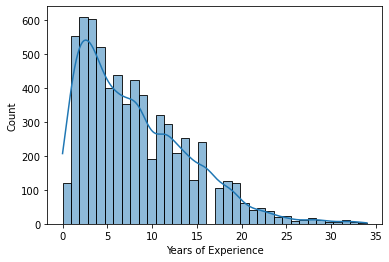

In [24]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

اکثر کارمندان مجموعه داده 0-7 سال در حوزه های مربوطه تجربه دارند که به ویژه اکثریت آنها کمتر از 5 سال تجربه دارند. علاوه بر این، تعداد کارکنان در مجموعه داده با افزایش تعداد سال‌های تجربه کاهش می‌یابد.

### Country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

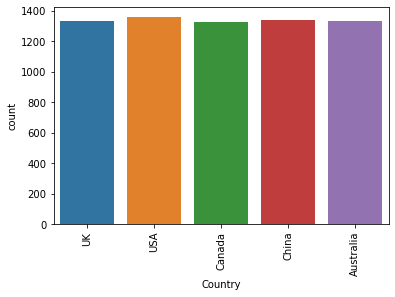

In [25]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)

تعداد کارمندان از 5 کشور فوق تقریباً یکسان است و در ایالات متحده آمریکا کمی بیشتر است.

### Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

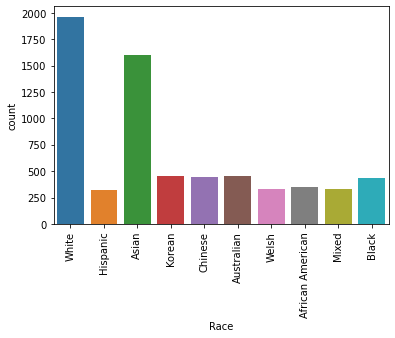

In [26]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

این نمودار به ما کمک می کند تا در مورد توزیع نژادی در مجموعه داده ها بدانیم. از نمودار مشخص است که اکثر کارمندان سفیدپوست یا آسیایی هستند و پس از آن کره ای ها، چینی ها، استرالیایی ها و سیاه پوستان قرار دارند. تعداد کارمندان از نژاد ولزی، آفریقایی آمریکایی، مختلط و اسپانیایی در مقایسه با سایر گروه ها کمتر است.



از تمام نمودارها و نمودارهای بالا، می‌توان به اطلاعاتی که با آنها سر و کار داریم، توزیع و کمیت آن‌ها نیز پی برد. اکنون می‌خواهم واقعیت این متغیرهای مستقل را با متغیر هدف یعنی حقوق و دستمزد بررسی کنم.

### Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

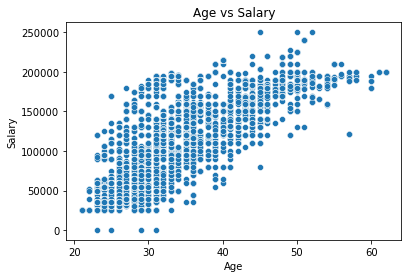

In [27]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

در این نمودار پراکنندگی، روندی را مشاهده می کنیم که حقوق افراد با افزایش سن افزایش می یابد، که به دلیل ارتقاء و ارتقاء سطح مشهود است. با این حال، با مشاهده دقیق تر، می توانیم متوجه شویم که سن مشابه دارای حقوق های متعدد است، به این معنی که عوامل دیگری وجود دارد که حقوق را تعیین می کند.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

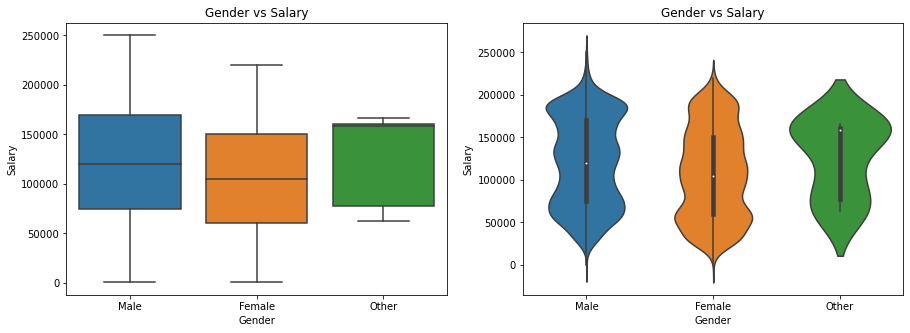

In [28]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

نمودار  جعبه و ویولن، توزیع دستمزد بین سه جنس را توصیف می کند. در باکس پلات، کارمندان از جنس دیگر در مقایسه با سایر  و زن حقوق بسیار بالایی دارند. سایر کارمندان جنسیتی دارای میانگین حقوق بالای 150000 هستند، پس از آن مردان با حقوق متوسط ​​نزدیک به 107500 و زنان با حقوق متوسط ​​نزدیک به 100000 قرار دارند. بالای 150000. در تولیدات این توزیع بین 50000 تا 10000 و همچنین نزدیک به 200000 متمرکز است. در مورد زنان توزیع حقوق در مقایسه با سایر جنسیت ها با بیشترین نزدیک به 50000 کاملاً گسترده است.

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

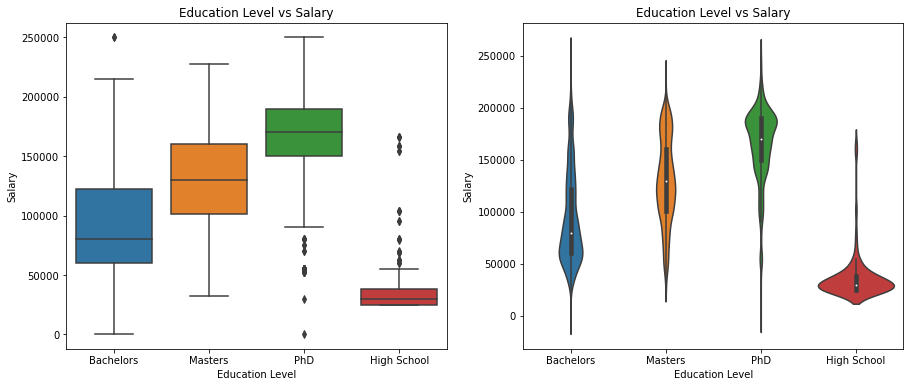

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

 نمودار باکس پلات  و ویولن، توزیع حقوق را بر اساس سطح تحصیلات کارکنان نشان می دهد. متوسط ​​حقوق برای دارندگان مدرک دکترا بالاترین سطح را دارد و پس از آن دارندگان مدرک کارشناسی ارشد و لیسانس، با کارکنان بدون مدرک کمترین میانگین حقوق را دارند. در ویولن پلات، دانش پژوهان دکترا حدود 200000 توزیع دارند، در حالی که دارندگان مدرک کارشناسی ارشد توزیع بسیار نابسامانی دارند که در آن توزیع حقوق از 100 هزار تا 150 هزار است، دارندگان مدرک لیسانس حدود 50000 حقوق دارند در حالی که کارمندان بدون مدرک حقوق دارند. توزیع نزدیک به 40-45k.

از این نمودار، فرض می‌کنم که کارکنان با تحصیلات بالاتر حقوق بیشتری نسبت به کارمندان با تحصیلات پایین‌تر دارند.

### Job Title and Salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

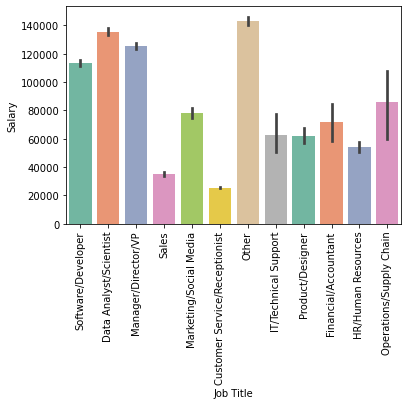

In [30]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'Set2')
plt.xticks(rotation = 90)

این نمودار فرضیه قبلی من را در مورد تقاضا و پرداخت با توجه به عناوین شغلی  رد می کند. در این نمودار، عناوین شغلی «سایر» نسبت به عناوینی که تقاضا و دستمزد بالایی دارند، حقوق بیشتری دارند. برخلاف نمودار عنوان شغلی قبلی، این نمودار نشان می دهد که هیچ ارتباطی بین توزیع عنوان شغل و حقوق وجود ندارد. عناوین شغلی که حقوق بالا می‌دادند از نظر تعداد کمتر هستند.

با این حال، این فرضیه در مورد عناوین شغلی مانند توسعه دهنده نرم افزار، تحلیلگر داده/scuentust و مدیر/مدیر/ معاونت صحیح است. این عناوین شغلی دارای تقاضا و دستمزد بالا هستند. اما بر خلاف آن عناوین شغلی مانند عملیات/زنجیره تامین، منابع انسانی، مالی/حسابدار و بازاریابی/رسانه‌های اجتماعی حقوق بسیار بیشتری دارند.

### Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

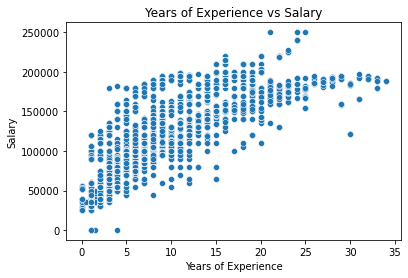

In [31]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

از این نمودار مشخص می شود که در مجموع حقوق کارمندان با سال ها تجربه در حال افزایش است. با این حال، با نگاهی دقیق تر می توانیم ببینیم که تجربه های مشابه حقوق متفاوتی دارند. این به این دلیل است که حقوق و دستمزد به عوامل دیگری مانند عنوان شغل، سن، سطح تحصیلات جنسی که قبلاً گفته شد نیز بستگی دارد.

### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

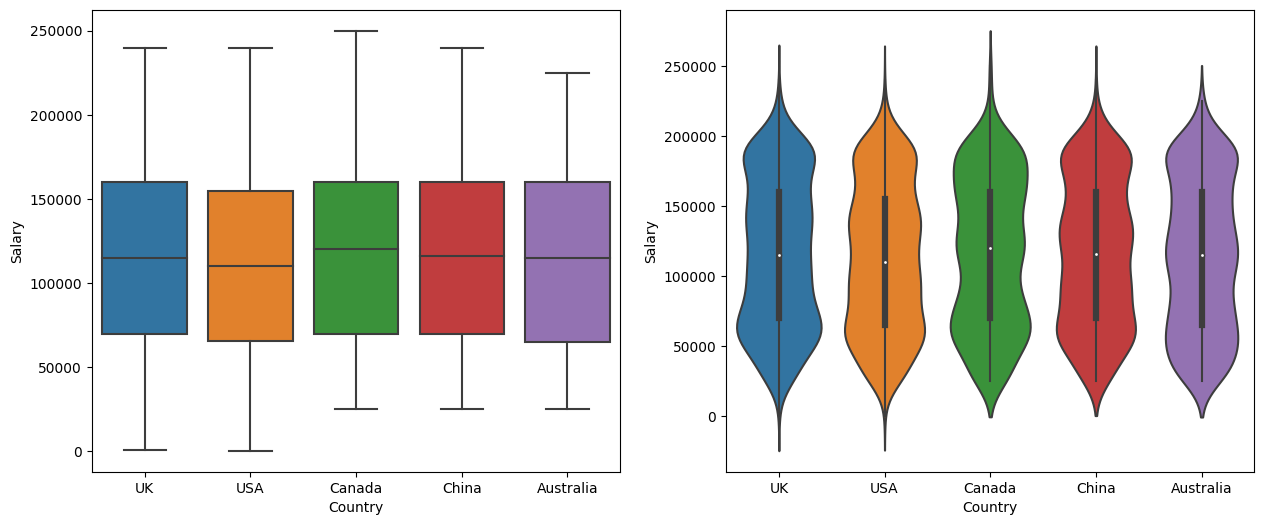

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

هم باکس پلات و هم پلات ویولن بینش بسیار مشابهی را در مورد دستمزد در همه کشورها حتی در توزیع ویولن نشان می دهند. با این حال، تفاوت بسیار کمی در حقوق متوسط ​​در ایالات متحده وجود دارد که در مقایسه با سایر کشورها کمی کمتر است.



از آنجایی که ما نمی توانیم اطلاعات زیادی در مورد حقوق و دستمزد با توجه به کشورها بدست آوریم. بنابراین، من نمودار عنوان شغل در برابر حقوق را برای هر کشور ترسیم می کنم، تا بتوانیم یک نمای کلی از عنوان شغل در برابر حقوق برای هر کشور داشته باشیم.

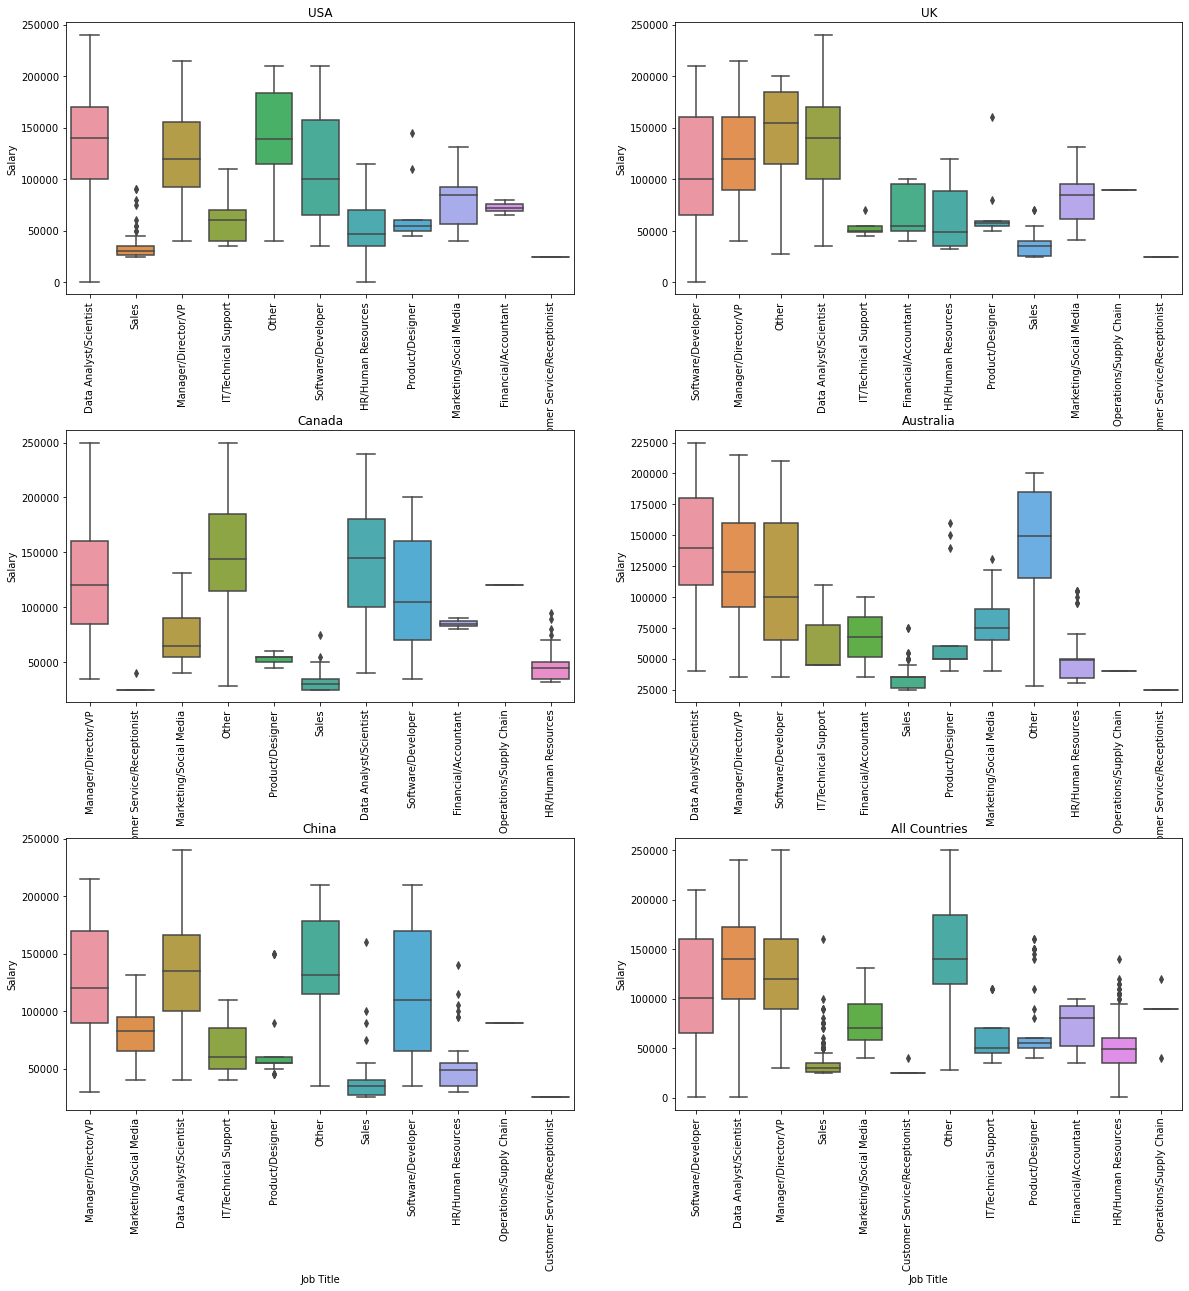

In [32]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

پس از مشاهده همه این طرح‌ها، به این نتیجه رسیدم که عناوین شغلی مانند توسعه‌دهنده نرم‌افزار، مدیر/مدیر/ معاون و تحلیلگر داده/دانشمند دارای تقاضای بالایی هستند و همچنین حقوق بسیار بالاتری نسبت به سایر عناوین شغلی دریافت می‌کنند، به استثنای عنوان‌های شغلی دسته "سایر". عناوین شغلی مانند عملیات / زنجیره تامین، خدمات مشتری / پذیرش، طراح محصول و فروش دارای تقاضای کمی هستند و حقوق کمی دارند.

### Race and Salary

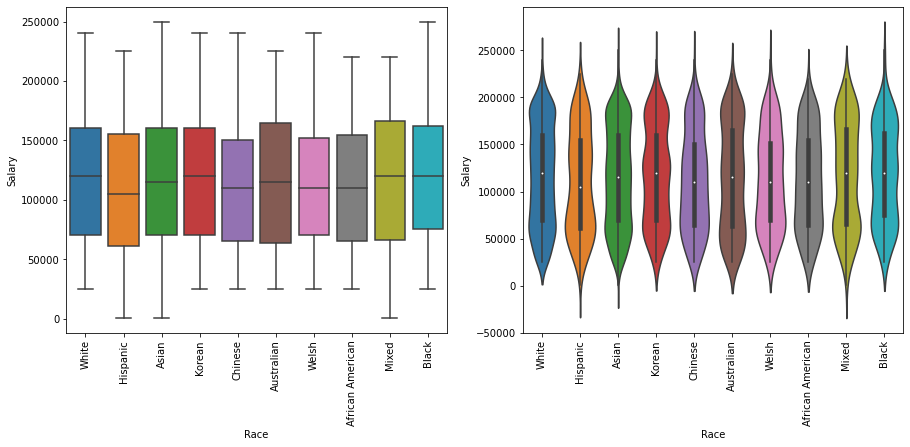

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


## Data Preprocessing 2

### Label encoding to categorical features

In [34]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization   

In [35]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [36]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


## Coorelation Matrix Heatmap

<AxesSubplot:>

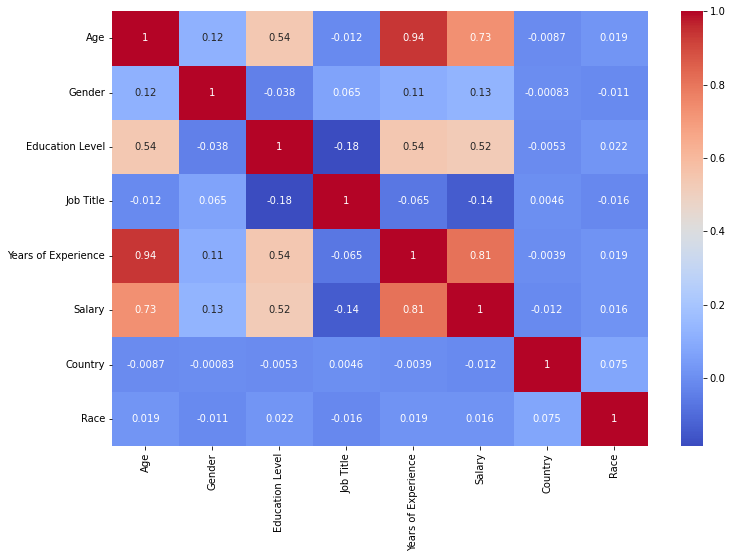

In [37]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

در این ماتریس همبستگی، سه همبستگی عمده وجود دارد.

حقوق و سن
حقوق و سالها سابقه کار
سالها تجربه و سن
حقوق و دستمزد همبستگی با سن و سال تجربه قبلاً در قطعه های فوق بررسی شده است. همبستگی بین سال‌های تجربه و سن مشهود است، زیرا در سنین بالا، تجربه بیشتر خواهد بود.

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

## Salary Prediction

I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

#### Hypertuning the model

In [40]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


Building the model on best parameters

In [41]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [42]:
#fitting the training data
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [43]:
#training accuracy
dtree.score(X_train, y_train)

0.9656459784687974

In [44]:
#predicting the salary of an employee 
d_pred = dtree.predict(X_test)

## Evaluating the Decision Tree Regressor Model

In [45]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.678470
1,-0.745659,-0.688434
2,-0.290405,-0.290405
3,-1.048183,-1.036343
4,-0.669294,-0.610093
5,1.414598,1.494747
6,-0.820850,-0.715794
7,-1.142906,-1.122777
8,1.509320,1.554189
9,0.277930,0.287811


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

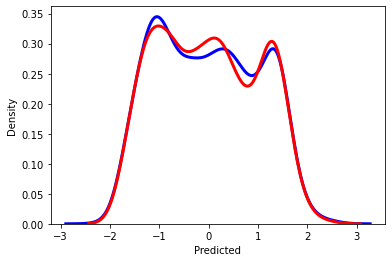

In [46]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

رنگ آبی تعداد توزیع برای مقادیر واقعی و خط قرمز تعداد توزیع برای مقادیر پیش بینی شده را نشان می دهد. مقادیر پیش بینی شده نزدیک به مقادیر واقعی هستند و منحنی منحنی با منحنی مقادیر واقعی منطبق است. این نشان می دهد که مدل مناسب است.

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9323013355107719
Mean Squared Error:  0.06928069008068977
Mean Absolute Error:  0.13812719621413622
RMSE: 0.2632122529075912


### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [49]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
#training accuracy
rfg.score(X_train, y_train)

0.9880574471237078

In [51]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

## Evaluating Random Forest Regressor Model

In [52]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.652540
1,-0.745659,-0.728208
2,-0.290405,-0.316169
3,-1.048183,-1.047236
4,-0.669294,-0.638036
5,1.414598,1.499137
6,-0.820850,-0.808867
7,-1.142906,-1.113744
8,1.509320,1.538028
9,0.277930,0.313259


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

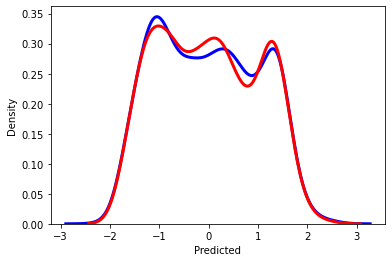

In [53]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

رنگ آبی تعداد توزیع برای مقادیر واقعی و خط قرمز تعداد توزیع برای مقادیر پیش بینی شده را نشان می دهد. مقادیر پیش بینی شده نزدیک به مقادیر واقعی هستند و منحنی منحنی با منحنی مقادیر واقعی منطبق است. این نشان می دهد که مدل مناسب است.

In [54]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9475481589634259
Mean Squared Error:  0.05367756912833498
Mean Absolute Error:  0.11332504234527271
RMSE: 0.23168420129204967


## GradientBoostingRegressor

In [64]:
from  sklearn.ensemble import HistGradientBoostingRegressor
gbc=HistGradientBoostingRegressor()

In [65]:
# Fit train data to GBC

gbc.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [66]:
#training accuracy
gbc.score(X_train, y_train)

0.9508630305958956

In [71]:
#predicitng salary of the employee
g_pred = gbc.predict(X_test)

##  Evaluating Gradient Boosting  Regressor Model¶

In [72]:
dgbc = pd.DataFrame({'Actual': y_test, 'Predicted': g_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.652540
1,-0.745659,-0.728208
2,-0.290405,-0.316169
3,-1.048183,-1.047236
4,-0.669294,-0.638036
5,1.414598,1.499137
6,-0.820850,-0.808867
7,-1.142906,-1.113744
8,1.509320,1.538028
9,0.277930,0.313259


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

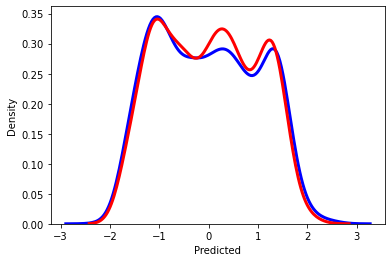

In [73]:
ax = sns.distplot(dgbc['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dgbc['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [74]:
print("R2 Score: ", r2_score(y_test, g_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, g_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, g_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, g_pred)))

R2 Score:  0.9355118298276593
Mean Squared Error:  0.0659951708839339
Mean Absolute Error:  0.16356675370296503
RMSE: 0.2568952527469784


## Conclusion

از تجزیه و تحلیل داده های اکتشافی،  حقوق و دستمزد کارکنان به عوامل زیر بستگی دارد:

سال ها تجربه

عنوان شغلی

سطح تحصیلات

کارمندانی که سالها تجربه بیشتری دارند، دارای عنوان شغلی مانند تحلیلگر داده/دانشمند، توسعه دهنده نرم افزار یا مدیر/مدیر/ معاونت و دارای مدرک کارشناسی ارشد یا دکترا هستند، به احتمال زیاد حقوق بیشتری دارند.

 رگرسیون - Regressor      رگرسیون جنگل تصادفی با دقت 94.6 درصد عملکرد خوبی داشته است.